# LSTM (without sentiment variables)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

from torch.utils.data import DataLoader, TensorDataset

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import os

In [2]:
pwd = os.getcwd()

df = pd.read_csv(pwd + '\merged_data.csv')
df.head()

,date,Open,Close,Change,majority_sentiment,average_sentiment
0,2025-02-28,3913.54,3915.439,0.048601,2,0.890644
1,2025-02-27,3908.73,3913.537,0.122904,2,0.954200
2,2025-02-26,3910.01,3908.733,-0.032736,0,0.812788
3,2025-02-25,3920.37,3910.013,-0.264057,2,0.835742
4,2025-02-24,3883.52,3920.365,0.948727,2,0.809047


In [3]:
df.columns

Index(['date', 'Open', 'Close', 'Change', 'majority_sentiment',
       'average_sentiment'],
      dtype='object')

In [4]:

# Convert 'Date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Select features and target variable
features = ['Open', 'Change'] # Add more relevant features
target = 'Close'

# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + [target]])

In [5]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length, -1]  # Target is the last column (Close price)
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


seq_length = 10 # Adjust the sequence length as needed
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1) #Adjust epochs and batch size


# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)


Epoch 1/200
25/25 [==============================] - 4s 8ms/step - loss: 0.0218
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 8/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 9/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 10/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 11/200
25/25 [==============================] - 0s 8ms/step - loss: 8.7480e-04
Epoch 12/200
25/25 [==============================] - 0s 8ms/step - loss: 8.0219e-04
Epoch 13/200
25/25 [=========

7/7 [==============================] - 1s 4ms/step
Test Loss (MSE): 4.552035534288734e-05
Mean Absolute Error (MAE): 6.911364783216822
R-squared (R2): 0.986478116407425


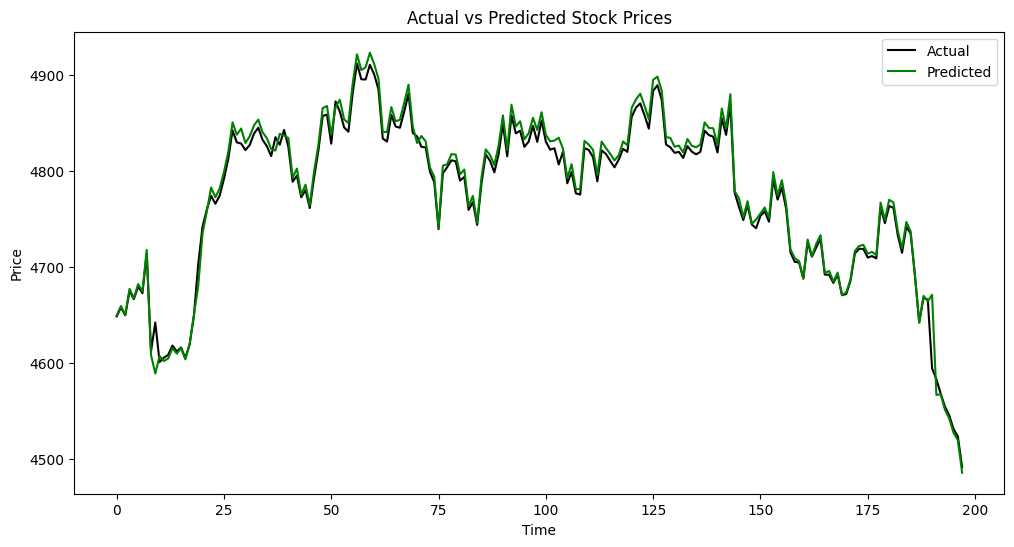

In [7]:
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model.predict(X_test)

# Inverse transform the scaled data to get actual prices
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred.reshape(-1, 1)), axis=1))[:, -1]

mae = mean_absolute_error(y_test_actual, y_pred_actual)

# Calculate R-squared (R2)
r2 = r2_score(y_test_actual, y_pred_actual)

# Print the results
print(f"Test Loss (MSE): {loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='black')
plt.plot(y_pred_actual, label='Predicted', color='green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# LSTM (with sentiment varaibles)

Epoch 1/200
25/25 [==============================] - 4s 8ms/step - loss: 0.0184
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 3/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 8/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 9/200
25/25 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 10/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 11/200
25/25 [==============================] - 0s 7ms/step - loss: 9.2137e-04
Epoch 12/200
25/25 [==============================] - 0s 7ms/step - loss: 8.1468e-04
Epoch 13/200
25/25 [========

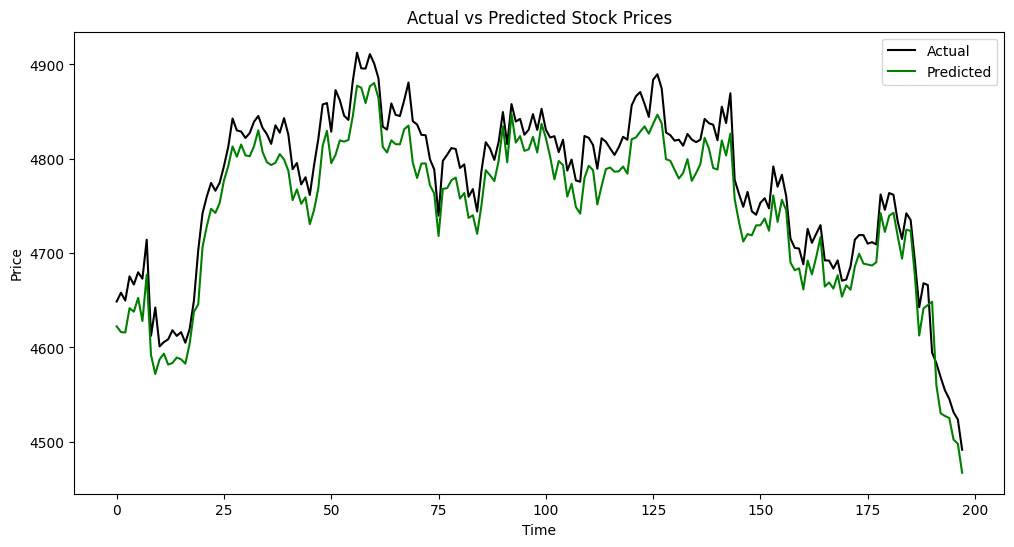

In [8]:
features = ['Open', 'Change', 'majority_sentiment', 'average_sentiment'] # Add more relevant features
target = 'Close'

# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + [target]])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length, -1]  # Target is the last column (Close price)
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


seq_length = 10 # Adjust the sequence length as needed
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1) #Adjust epochs and batch size


# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)


import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model.predict(X_test)

# Inverse transform the scaled data to get actual prices
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred.reshape(-1, 1)), axis=1))[:, -1]

mae = mean_absolute_error(y_test_actual, y_pred_actual)

# Calculate R-squared (R2)
r2 = r2_score(y_test_actual, y_pred_actual)

# Print the results
print(f"Test Loss (MSE): {loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='black')
plt.plot(y_pred_actual, label='Predicted', color='green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# CNN

In [9]:
df = pd.read_csv(pwd +'\merged_data.csv')
df.head()

,date,Open,Close,Change,majority_sentiment,average_sentiment
0,2025-02-28,3913.54,3915.439,0.048601,2,0.890644
1,2025-02-27,3908.73,3913.537,0.122904,2,0.954200
2,2025-02-26,3910.01,3908.733,-0.032736,0,0.812788
3,2025-02-25,3920.37,3910.013,-0.264057,2,0.835742
4,2025-02-24,3883.52,3920.365,0.948727,2,0.809047


In [10]:
# Assuming 'df' is your DataFrame
# Select relevant columns and convert the 'Date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])
data = df[['date', 'Close']]
data = data.set_index('date')

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare the data for the CNN
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10 # Example sequence length
X, y = create_sequences(data['Close'].values, seq_length)

# Reshape data for CNN input
X = X.reshape(X.shape[0], X.shape[1], 1)


# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model 
model.fit(X, y, epochs=200, batch_size=32, verbose=1) # Adjust epochs and batch size as needed


Epoch 1/200
31/31 [==============================] - 1s 2ms/step - loss: 0.0153
Epoch 2/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 3/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 4/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 6/200
31/31 [==============================] - 0s 2ms/step - loss: 8.6358e-04
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - loss: 7.9635e-04
Epoch 8/200
31/31 [==============================] - 0s 2ms/step - loss: 7.3951e-04
Epoch 9/200
31/31 [==============================] - 0s 2ms/step - loss: 7.0989e-04
Epoch 10/200
31/31 [==============================] - 0s 2ms/step - loss: 8.7878e-04
Epoch 11/200
31/31 [==============================] - 0s 2ms/step - loss: 7.9661e-04
Epoch 12/200
31/31 [==============================] - 0s 2ms/step - loss: 7.0074e-04
Epoch 13/

31/31 [==============================] - 0s 1ms/step - loss: 4.6582e-04
Test Loss: 0.0004658217076212168
Mean Absolute Error (MAE): 22.85562892992426
R-squared (R2): 0.9948302127492212


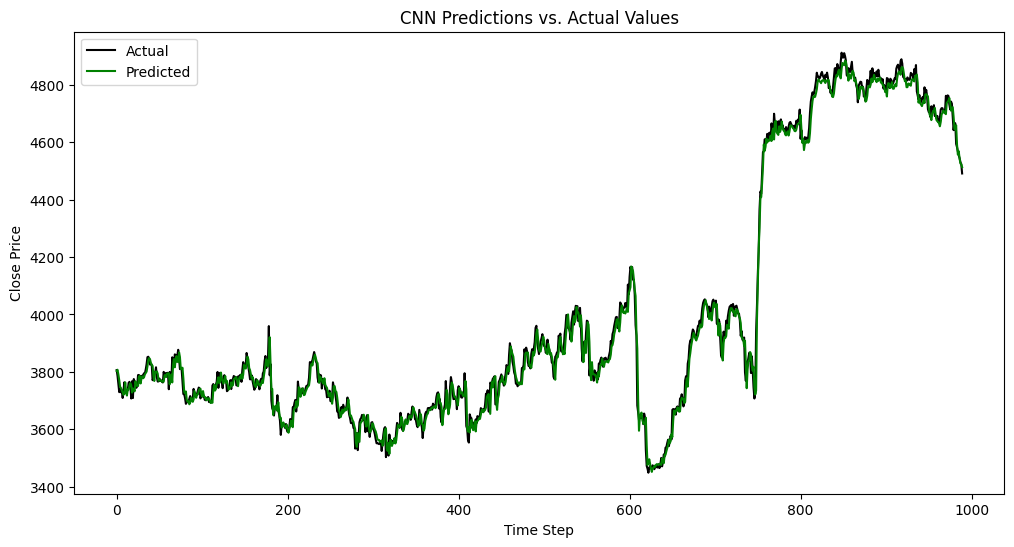

In [11]:
predictions = model.predict(X)

# Inverse transform the predictions and actual values to get original scale
predictions = scaler.inverse_transform(predictions)
y_original = scaler.inverse_transform(y.reshape(-1, 1))

# print loss
loss = model.evaluate(X, y)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_original, predictions)

# Calculate the R-squared (R2)
r2 = r2_score(y_original, predictions)

# Print the results
print(f"Test Loss: {loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(y_original, label='Actual', color='black')
plt.plot(predictions, label='Predicted', color='green')
plt.legend()
plt.title('CNN Predictions vs. Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.show()

In [12]:
dataset = pd.read_csv(pwd + '/merged_data.csv', index_col=0)
dataset.head()

,Open,Close,Change,majority_sentiment,average_sentiment
date,,,,,
2025-02-28,3913.54,3915.439,0.048601,2,0.890644
2025-02-27,3908.73,3913.537,0.122904,2,0.954200
2025-02-26,3910.01,3908.733,-0.032736,0,0.812788
2025-02-25,3920.37,3910.013,-0.264057,2,0.835742
2025-02-24,3883.52,3920.365,0.948727,2,0.809047


# LSTM-CNN

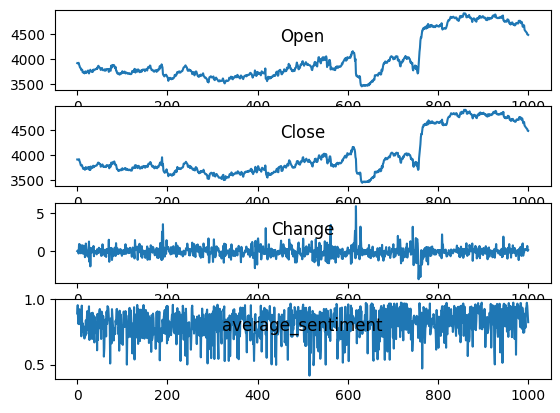

In [14]:
values = dataset.values

# specify columns to plot
groups = [0, 1, 2, 4]
i = 1

# plot each column
plt.figure()

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='center')
    i += 1
plt.show()

In [15]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [16]:
# load dataset
dataset = pd.read_csv(pwd + '/merged_data.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
# encoder = LabelEncoder()
# values[:,3] = encoder.fit_transform(values[:,3])
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)'],
      dtype='object')


In [17]:
reframed.drop(reframed.columns[[5,7,8,9]], axis=1, inplace=True)  # drop all except var2(t) (Close price)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var2(t)
1   0.317778   0.319074   0.384768        1.0   0.850623  0.317775
2   0.314492   0.317775   0.392624        1.0   0.964518  0.314494
3   0.315367   0.314494   0.376168        0.0   0.711102  0.315368
4   0.322442   0.315368   0.351712        1.0   0.752235  0.322438
5   0.297275   0.322438   0.479934        1.0   0.704397  0.297275


In [18]:
values = reframed.values
n_train = int(len(values) * 0.8)
train = values[:n_train, :]
test = values[n_train:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(800, 1, 5) (800,) (200, 1, 5) (200,)


In [19]:
n_samples = train_X.shape[0]
n_features = train_X.shape[2]

print(n_samples)
print(n_features)

800
5


In [20]:
model = Sequential()

# 1D Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, n_features)))

model.add(MaxPooling1D(pool_size=1))

# LSTM Layers
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

history = model.fit(train_X, train_y, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(test_X, test_y), 
                    verbose=2, 
                    shuffle=False)

# Predictions
yhat = model.predict(test_X)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             384       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 1, 50)             23000     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 43635 (170.45 KB)
Trainable params: 43635 (170.45 KB)
Non-trainable params: 0 (0.00 Byte)
________________

7/7 [==============================] - 0s 4ms/step - loss: 1.2194e-04
Test Loss: 0.00012193649308755994
Mean Absolute Error: 0.008967726491391659
R-squared Score: 0.9656518697738647


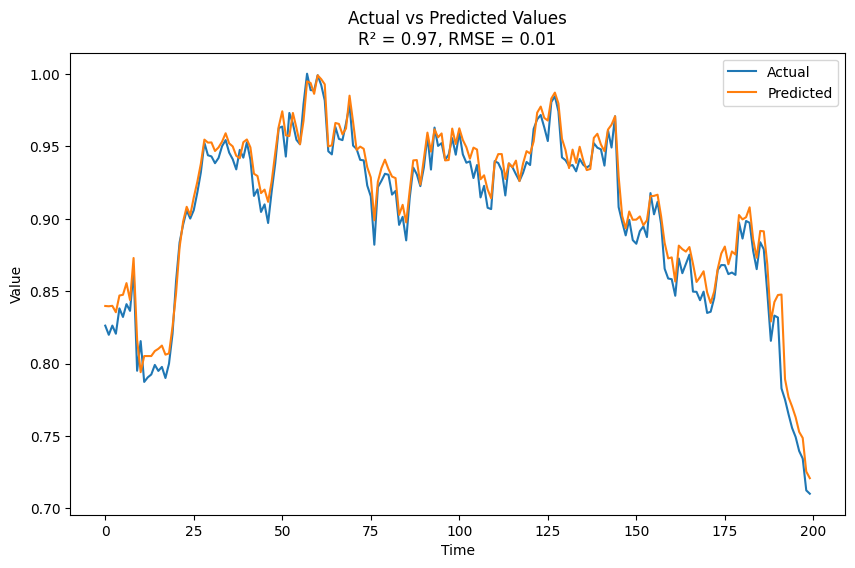

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_y, yhat)
mse = mean_squared_error(test_y, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, yhat)
loss = model.evaluate(test_X, test_y)

print(f'Test Loss: {loss}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(test_y, label='Actual')
plt.plot(yhat, label='Predicted')
plt.title(f'Actual vs Predicted Values\nR² = {r2:.2f}, RMSE = {rmse:.2f}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()